# System Path & Modules

In [1]:
import sys
print('Set search paths')
sys.path.append('/home/ollie/kbelling/Python/eddy_diag/eddies-git/')

Set search paths


# Main Script: Interpolate Original Data to Target Grid

Do everything for only one Dataset

In [2]:
import importlib

## Load Original Data

In [3]:
from eddies.data import data_loader
from eddies.grid import FESOM_grid
from eddies.grid import grid_transformer

Load 2d part of the grid in 0 second(s)


In [4]:
#---------
# Original Data
#---------
scheme   = 'Leith'
path     = '/work/ollie/sjuricke/outputSoufflet_20' + scheme + '/'
year     = '1950'
xx0, yy0 = FESOM_grid.elem_x, FESOM_grid.elem_y # Original grid-coordinates

(u, udis, v, vdis) = data_loader.load_original_data(path, year) # Element-Structure

#---------
# Transform to matrix structure
#---------
u_matrix    = grid_transformer.elem_to_matrix(u, yy0)
v_matrix    = grid_transformer.elem_to_matrix(v, yy0)
udis_matrix = grid_transformer.elem_to_matrix(udis, yy0)
vdis_matrix = grid_transformer.elem_to_matrix(vdis, yy0)

What scheme (GAMB, EASY4)?easy4


## Interpolate to Regular Grid

Questions:
1) Why are NaN Values still in interpolated data, even though I checked for original coordinates?

In [5]:
#-------
# Interpolate data
#-------

#- Modules
import random
from eddies.grid import setup_grid
from eddies.interpolation import interpolator
from eddies.figures import plotter

#- Parameters
days   = 1 #- Number of days to analyze
lvls   = 1 #- Number of levels to analyze
xx     = xx0[:-228] #- Coordinates Original Grid. Omit last row for interpolation
yy     = yy0[:-228]
dx     = 0.01       #- Grid-Spacing Target Grid
dy     = 0.01
lx     = 4.5        #- Dimensions of Target Grid
ly     = 18.0 
method = 'linear'   #- Interpolation method

#- Setup Target Grid
eps1 = round(random.uniform(0, .09), ndigits=4) # Randomize starting points
eps2 = round(random.uniform(0, .05), ndigits=4)
sx = 0.0083 # eps1 #- Starting points
sy = 0.0263 # eps2
XX1, YY1 = setup_grid.regular_grid(lx=lx, ly=ly, dx=dx, dy=dy, sx=sx, sy=sy) 

#- Crop Target grid within original coordinates
ny_min = min(np.where(np.unique(YY1) > np.min(yy0))[0])
ny_max = max(np.where(np.unique(YY1) < np.max(yy0))[0])
nx_min = min(np.where(np.unique(XX1) > np.min(xx0))[0])
nx_max = max(np.where(np.unique(XX1) < np.max(xx0))[0])

XX1 = XX1[ny_min:ny_max, nx_min:nx_max]
YY1 = YY1[ny_min:ny_max, nx_min:nx_max]

#- Interpolation
u_int    = interpolator.interpolate_to_grid(u[:,:-228,:], xx, yy, XX1, YY1, days, lvls, method)
v_int    = interpolator.interpolate_to_grid(v[:,:-228,:], xx, yy, XX1, YY1, days, lvls, method)
udis_int = interpolator.interpolate_to_grid(udis[:,:-228,:], xx, yy, XX1, YY1, days, lvls, method)
vdis_int = interpolator.interpolate_to_grid(vdis[:,:-228,:], xx, yy, XX1, YY1, days, lvls, method)

#- Check for NaN-Values
print(f'NaN-Values in u_int: {np.isnan(u_int).sum()}')

Starting interpolation
Interpolate day 1
Interpolate lvl 1
Ending interpolation
Starting interpolation
Interpolate day 1
Interpolate lvl 1
Ending interpolation
Starting interpolation
Interpolate day 1
Interpolate lvl 1
Ending interpolation
Starting interpolation
Interpolate day 1
Interpolate lvl 1
Ending interpolation
NaN-Values in u_int: 33


In [6]:
#- Plot Original and Interpolated Grid
day = 0
lvl = 0
fig1 = plotter.compare_original_interpolated(u_matrix[:,:,:-1,:lvls], u_int, day, lvl, xx, yy) # Last row omitted in interpolation.

## Save Interpolated Values to Disk

In [12]:
from eddies.data import data_saver
folder = '../resources/interpolated_data/'
f1,f2,f3,f4 = data_saver.save_interpolated_values(u_int, udis_int, v_int, vdis_int, 
                                                  year=year, scheme=scheme, 
                                                  dx=dx, dy=dy, sx=sx, sy=sy, 
                                                  folder=folder, method=method
                                                 )

# Main Script: Analyze Interpolated Data using 2D-FFT

## Load Original Data

In [7]:
from eddies.data import data_loader
from eddies.grid import FESOM_grid
from eddies.grid import grid_transformer

In [8]:
#---------
# Original Data
#---------
scheme   = 'Leith'
path     = '/work/ollie/sjuricke/outputSoufflet_20' + scheme + '/'
year     = '1950'
xx0, yy0 = FESOM_grid.elem_x, FESOM_grid.elem_y # Original grid-coordinates
xx, yy   = xx0[:-228], yy0[:-228] #- Coordinates without last row

(u, udis, v, vdis) = data_loader.load_original_data(path, year) # Element-Structure

#---------
# Transform to matrix structure
#---------
u_matrix    = grid_transformer.elem_to_matrix(u, yy0)
v_matrix    = grid_transformer.elem_to_matrix(v, yy0)
udis_matrix = grid_transformer.elem_to_matrix(udis, yy0)
vdis_matrix = grid_transformer.elem_to_matrix(vdis, yy0)

## Load Interpolated Values from Disk

Comment: Make everything below this executable in order to start from here.

In [11]:
#----------
# Load interpolated data
# Make sure it is the same year as original data
#----------
method = 'linear'
filled = 'filled_boarders'
f1 = '../resources/interpolated_data/u'   + '_' + scheme + '_' + str(year) + '_0c01_0c01_0c0083_0c0263_' + method + '_' + filled  
f2 = '../resources/interpolated_data/udis'+ '_' + scheme + '_' + str(year) + '_0c01_0c01_0c0083_0c0263_' + method + '_' + filled
f3 = '../resources/interpolated_data/v'   + '_' + scheme + '_' + str(year) + '_0c01_0c01_0c0083_0c0263_' + method + '_' + filled
f4 = '../resources/interpolated_data/vdis'+ '_' + scheme + '_' + str(year) + '_0c01_0c01_0c0083_0c0263_' + method + '_' + filled
u_int    = np.load(f1 + '.npy')
udis_int = np.load(f2 + '.npy')
v_int    = np.load(f3 + '.npy')
vdis_int = np.load(f4 + '.npy')

#- Parameters of interpolated data
days = u_int.shape[0]
ny   = u_int.shape[1]
nx   = u_int.shape[2]
nz   = u_int.shape[3]

In [8]:
from eddies.interpolation import interpolation_tools

In [9]:
#- Fill boarders
u_int    = interpolation_tools.fill_boarders(u_int)
v_int    = interpolation_tools.fill_boarders(v_int)
udis_int = interpolation_tools.fill_boarders(udis_int)
vdis_int = interpolation_tools.fill_boarders(vdis_int)

In [304]:
#- Cut NaN Values out
u_int    = interpolation_tools.cut_boarders(u_int)
v_int    = interpolation_tools.cut_boarders(v_int)
udis_int = interpolation_tools.cut_boarders(udis_int)
vdis_int = interpolation_tools.cut_boarders(vdis_int)

## Apply Hanning Window in meridional direction if necessary

In [9]:
from eddies.interpolation import interpolation_tools
from eddies.figures import plotter

In [12]:
is_hw = False

if is_hw: 
    u_int    = interpolation_tools.apply_hanning_window(u_int   , axis=1)
    v_int    = interpolation_tools.apply_hanning_window(v_int   , axis=1)
    udis_int = interpolation_tools.apply_hanning_window(udis_int, axis=1)
    vdis_int = interpolation_tools.apply_hanning_window(vdis_int, axis=1)

In [10]:
#- Compare fields before applying 2D-FFT
day = 0
lvl = 0
nz  = 1
fig1 = plotter.compare_original_interpolated(u_matrix[:,:,:-1,:nz], u_int, day, lvl, xx, yy) # Last row omitted in interpolation.
fig1.show()

## Apply 2D-FFT

In [11]:
from eddies.diagnostics import spectra
from eddies.data import data_saver
from eddies.interpolation import interpolation_tools

In [17]:
#- Calculate and collapse 2D-Spectrum
(ske_collapsed, sd_collapsed, kkarr) = spectra.get_2D_spectrum(u_int, v_int, udis_int, vdis_int)

In [18]:
print(u_int.shape)
print(ske_collapsed.shape)

(1, 1779, 422, 1)
(1, 915, 1)


### Check Wavenumber 0 

In [19]:
#- Check if np.fft.fft2 puts normal sum at position [0,0]
#- Answer: It does but there is a complex part involved. Maybe thats the source. But ske_collapsed at index 0 is a real number.
#- So it should not be a problem.
print(np.sum(u_int, axis=(1,2)))
print(np.fft.fft2(u_int, axes=(1,2))[:,0,0,:])

[[54068.17883754]]
[[54068.17883754-1.87228011e-12j]]


In [22]:
#- Shouldnt Wavenumber 0 be the same as the sum over all other wavenumbers after collapsing?
value_wn0 = ske_collapsed[:,0,:] #- Value of WN0 after collapsing
value_sm  = np.sum(ske_collapsed[:,1:,:]) #- Value of sum of all other wavenumbers after collapsing
print(value_wn0) 
print(value_sm) 
print(value_sm / value_wn0) # Ratio between those above

[[0.00259345]]
0.009959601769587323
[[3.84029524]]


In [117]:
# #- Save collapsed 2D-Spectrum
# # Parameters
# dx = 0.01
# dy = 0.01 
# sx = 0.0083
# sy = 0.0263
# year = 1950
# #scheme = 'Leith'
# folder = '../resources/collapsed_2D_spectra/'
# method = 'linear'
# is_hw = False

# # Saving
# data_saver.save_collapsed_spectra(ske_collapsed, sd_collapsed, year, scheme, dx, dy, sx, sy, folder, method, is_hw)

Want to save (y/n)?y
KE saved to ../resources/collapsed_2D_spectra/collapsed2D_KE_Leith_1950_0c01_0c01_0c0083_0c0263_linear
DIS saved to ../resources/collapsed_2D_spectra/collapsed2D_DIS_Leith_1950_0c01_0c01_0c0083_0c0263_linear
All data saved


('../resources/collapsed_2D_spectra/collapsed2D_KE_Leith_1950_0c01_0c01_0c0083_0c0263_linear',
 '../resources/collapsed_2D_spectra/collapsed2D_DIS_Leith_1950_0c01_0c01_0c0083_0c0263_linear')

## Plot collapsed spectra of 2D-FFT

1) Add labeling

2) Do we need mean (and standard deviation plot) over many ensembles with same dx=dy but different sx and sy for all data?

In [15]:
#- Load collapsed 2D-Spectra
folder = '../resources/collapsed_2D_spectra/'
dis1    = np.load(folder + 'collapsed2D_DIS_Easy4_1950_0c01_0c01_0c0083_0c0263_nearest_filled_boarders.npy') # shape: (days, dis, nz)
ke1     = np.load(folder + 'collapsed2D_KE_Easy4_1950_0c01_0c01_0c0083_0c0263_nearest_filled_boarders.npy')
dis2    = np.load(folder + 'collapsed2D_DIS_Leith_1950_0c01_0c01_0c0083_0c0263_nearest_filled_boarders.npy') 
ke2     = np.load(folder + 'collapsed2D_KE_Leith_1950_0c01_0c01_0c0083_0c0263_nearest_filled_boarders.npy') 

<ipython-input-16-02204cb592d6>:29: RuntimeWarning: divide by zero encountered in power
  ax[0].plot(xx, xx**-(5/3) / 10**2, color=colors[4], alpha=.3)
<ipython-input-16-02204cb592d6>:30: RuntimeWarning: divide by zero encountered in power
  ax[0].plot(xx, xx**-(3.0) / 10**2, color=colors[5], alpha=.3)
<ipython-input-16-02204cb592d6>:41: RuntimeWarning: divide by zero encountered in power
  ax[0].plot(xx, xx**-(5/3) / 10**2, color=colors[4], alpha=.3)
<ipython-input-16-02204cb592d6>:42: RuntimeWarning: divide by zero encountered in power
  ax[0].plot(xx, xx**-(3.0) / 10**2, color=colors[5], alpha=.3)


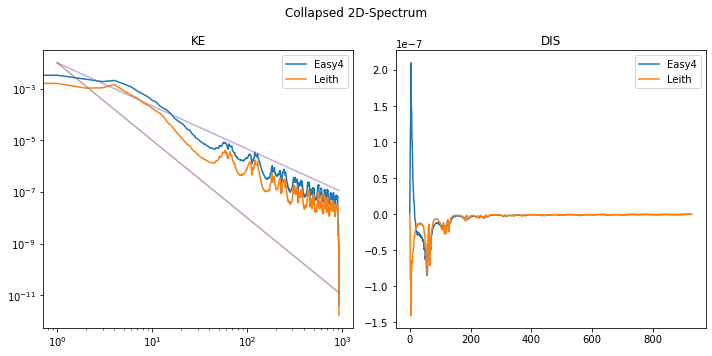

In [16]:
#------------
# Settings
#------------
import matplotlib.pyplot as plt
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
day    = 0
nz     = 0

#------------
# Plot
#------------

#- Values: Skipping k=0
y1 = np.mean(ke1,  axis=(0,2))[:] #- Scheme1
y2 = np.mean(dis1, axis=(0,2))[:]
y3 = np.mean(ke2,  axis=(0,2))[:] #- Scheme2
y4 = np.mean(dis2, axis=(0,2))[:]
xx = np.arange(len(y1))

#- Figure Settings
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
fig.suptitle('Collapsed 2D-Spectrum')

#-----------
# Scheme1
#-----------
#- Kinetic Energy
ax[0].plot(xx, y1, linestyle= '-', color=colors[0], label='Easy4')
ax[0].plot(xx, xx**-(5/3) / 10**2, color=colors[4], alpha=.3)
ax[0].plot(xx, xx**-(3.0) / 10**2, color=colors[5], alpha=.3)


#- Dissipation
ax[1].plot(xx, y2, linestyle= '-',  color=colors[0], label='Easy4')

#-----------
# Scheme2
#-----------
#- Kinetic Energy
ax[0].plot(xx, y3, linestyle= '-', color=colors[1], label='Leith')
ax[0].plot(xx, xx**-(5/3) / 10**2, color=colors[4], alpha=.3)
ax[0].plot(xx, xx**-(3.0) / 10**2, color=colors[5], alpha=.3)


#- Dissipation
ax[1].plot(xx, y4, linestyle= '-',  color=colors[1], label='Leith')

#- Axis settings
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].legend()
ax[0].set_title('KE')

ax[1].legend()
ax[1].set_title('DIS')

#- Show Figures
fig.tight_layout()
fig.show()

## Calculate Comparison of Total KE & DIS

In [17]:
from eddies.diagnostics import energetics
from eddies.data import data_saver

In [86]:
#- Calculate total energetics of original data
dis_orig = energetics.total_dis_orig(u, udis, v, vdis)
ke_orig  = energetics.total_ke_orig(u, v)

#- Calculate total energetics of interpolated data
ke_interp  = energetics.total_dis_orig(u_int, udis_int, v_int, vdis_int)
dis_interp = energetics.total_ke_orig(u_int, v_int)

In [77]:
#- Save collapsed 2D-Spectrum
# Parameters
#dx      = 0.01
#dy      = 0.01 
#sx      = 0.0083
#sy      = 0.0263
#year    = 1950
#scheme = 'Leith'
folder  = '../resources/total_energetics_interpolated/'
#method  = 'linear'
#is_hw   = False

# Saving
data_saver.save_total_energetics_interpolated(ke_interp, dis_interp, year, scheme, dx, dy, sx, sy, folder, method, is_hw)

Want to save (y/n)?y
KE saved to ../resources/total_energetics_interpolated/total_energetics_ke_interp_Leith_1950_0c01_0c01_0c0083_0c0263_linear
DIS saved to ../resources/total_energetics_interpolated/total_energetics_dis_interp_Leith_1950_0c01_0c01_0c0083_0c0263_linear
All data saved


## Plot Comparison of Total KE & DIS

1) Think about how to implement a function that gives scatterplot when input contains many ratios depending on several starting values and grid_spacings

In [18]:
import matplotlib.pyplot as plt
from eddies.tests import examples
from eddies.data import data_loader
from eddies.data import data_manager
from eddies.diagnostics import energetics
import numpy as np

In [19]:
#- Load Original data
scheme   = 'Leith'
path     = '/work/ollie/sjuricke/outputSoufflet_20' + scheme + '/'
year     = '1950'
nz       = 0
(u, udis, v, vdis) = data_loader.load_original_data(path, year) # Element-Structure

#- Calculate total energetics of original data
dis_orig = energetics.total_dis_orig(u, udis, v, vdis)
ke_orig  = energetics.total_ke_orig(u, v)
dis_orig = dis_orig[nz]
ke_orig  = ke_orig[nz]

In [26]:
importlib.reload(data_loader)

<module 'eddies.data.data_loader' from '/home/ollie/kbelling/Python/eddy_diag/eddies-git/eddies/data/data_loader.py'>

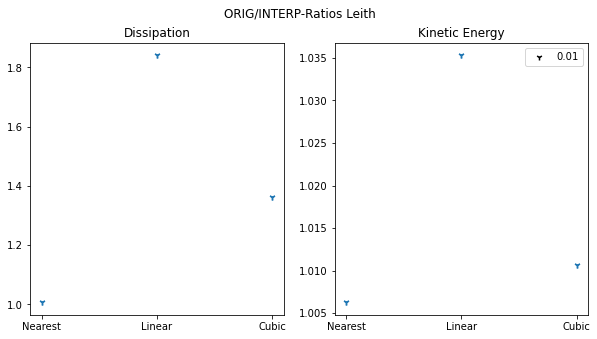

In [27]:
#- Grid001
#-- Load total energetics for all starting values
f_ke  = 'total_energetics_ke_interp_Leith_1950_0c01_0c01_0c0083_0c0263' 
f_dis = 'total_energetics_dis_interp_Leith_1950_0c01_0c01_0c0083_0c0263'

dis_interp1, ke_interp1 = data_loader.load_interpolated_total_energetics(f_dis, f_ke, filled=True) #- Starting value 1
dis_interp2, ke_interp2 = data_loader.load_interpolated_total_energetics(f_dis, f_ke, filled=True) # Starting value 2 (Example)

#-- Calculate Ratios
ke_interp  = np.concatenate((ke_interp1, 1.0 * ke_interp2,)) # 1.1 as an example if I have different starting values
dis_interp = np.concatenate((dis_interp1, 1.0* dis_interp2,))
ke_ratios  = ke_orig  / ke_interp
dis_ratios = dis_orig / dis_interp

#-- Save ratios in dictionary
dict001 = data_manager.create_gridspacing_dict(dis_ratios, ke_ratios)

#- Grid009
#-- Calculate ratios
#-- Save ratios in dictionary
                            
#- Create dictionary containing all gridspacings
dictionaries  = [dict001,]
grid_spacings = np.array([0.01,])
energy_ratios = data_manager.create_energyratios_dict(dictionaries, grid_spacings)

#- Scatter plot ratios
fig = plotter.scatter_energy_ratios(energy_ratios, scheme)

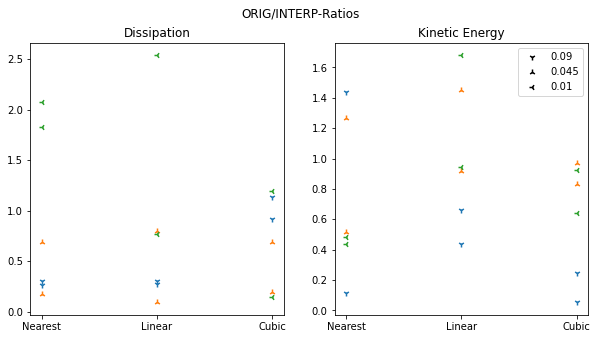

In [120]:
#- Example of scatter plots based on random data. Check this in order to know how to create one.
examples.scatter_plot_ratios()

# Develop Diagnostics for Cases A, B, C

# Work Area

## Work on 'data' package

### Module: data_loader 

## Work on 'interpolation' package

## Work on 'grid' package


## 'plotting' package

## 'diagnostics' package

# Calculation of all necessary quantities for all methods when new data is given

Restart Kernel before switching scheme

In [1]:
import sys
print('Set search paths')
sys.path.append('/home/ollie/kbelling/Python/eddy_diag/eddies-git/')

Set search paths


## Load Original Data

In [2]:
#- Modules
import random
import numpy as np
import matplotlib.pyplot as plt

from eddies.data import data_loader
from eddies.data import data_saver

from eddies.grid import FESOM_grid
from eddies.grid import grid_transformer
from eddies.grid import setup_grid

from eddies.interpolation import interpolator
from eddies.interpolation import interpolator
from eddies.interpolation import interpolation_tools

from eddies.diagnostics import spectra
from eddies.diagnostics import energetics

from eddies.figures import plotter

Load 2d part of the grid in 0 second(s)


In [3]:
schemes1 = ['Leith',
           'Easy4',
          ]

schemes2 = ['GAMB_1',
           'GAMB_3',
           'GAMB_7',
           'GAMB_8',
           'GAM4_1', 
           'GAM3_1', 
           'GAM3_4', 
           'GAM2_1', 
           'GAM2_4', 
           'GAM1_3',
          ]

path1 = '/work/ollie/sjuricke/outputSoufflet_20'
path2 = '/work/ollie/sjuricke/ChanComp/'

years    = [#'1949',
            '1950',
#             '1951',
#             '1952',
#             '1953',
#             '1954',
#             '1955',
#             '1956',
#             '1957',
           ]

model_run = 'easy4' # Run for Easy and Leith

In [4]:
%%time
#---------
# Original Data
#---------

#- Parameters
xx0, yy0 = FESOM_grid.elem_x, FESOM_grid.elem_y # Original grid-coordinates
days   = 365       #- Number of days to analyze
lvls   = 1          #- Number of levels to analyze
xx     = xx0[:-228] #- Coordinates Original Grid. Omit last row for interpolation
yy     = yy0[:-228]
dx     = 0.045       #- Grid-Spacing Target Grid
dy     = 0.045
lx     = 4.5        #- Dimensions of Target Grid
ly     = 18.0 
is_hw  = False      #- Effect of hanning window
interp_boarders = True #- If boarder are cut out or filled by nearest neighbours (not with scipy tool) 

#- Setup Target Grid
eps1     = round(random.uniform(0, .09), ndigits=4) # Randomize starting points
eps2     = round(random.uniform(0, .05), ndigits=4)
sx       = 0.0199#eps1 #- Starting points
sy       = 0.0181#eps2
XX1, YY1 = setup_grid.regular_grid(lx=lx, ly=ly, dx=dx, dy=dy, sx=sx, sy=sy) 

methods = ['nearest', 'linear', 'cubic']   #- Interpolation method

CPU times: user 348 µs, sys: 765 µs, total: 1.11 ms
Wall time: 631 µs


In [5]:
#- Create a set of 10 random starting values
starting_values = [#[0.0083, 0.0263],
#                    [0.0107, 0.0036],
#                    [0.0087, 0.015],
#                    [0.0199, 0.0181],
#                    [0.0206, 0.0367],
#                    [0.0284, 0.035],
#                    [0.037, 0.0497],
#                    [0.0386, 0.0225],
#                    [0.0597, 0.0396],
#                    [0.05, 0.0297],
                   [0.0669, 0.013],
                  ]  
# for i in range(10): 
#     sx = round(random.uniform(0, .09), ndigits=4)
#     sy = round(random.uniform(0, .05), ndigits=4)
#     starting_values.append([sx, sy])

In [6]:
for s in starting_values:
    sx = s[0]
    sy = s[1]
    XX1, YY1 = setup_grid.regular_grid(lx=lx, ly=ly, dx=dx, dy=dy, sx=sx, sy=sy)
    print(f'Starting values sx, sy: {sx, sy}')
    for scheme in schemes1:
        print(f'Diagnostics for scheme: {scheme}')
        for year in years:
            print(f'Diagnostics for year: {year}')

            path = path1 + scheme + '/'
            #- Load Data
            (u, udis, v, vdis) = data_loader.load_original_data(path, year, model_run) # Element-Structure

            #- Interpolate using all methods       
            for method in methods:
                print(f'Interpolating with {method} method')
                #-------
                # Interpolate data
                #-------
                u_int    = interpolator.interpolate_to_grid(u[:,:-228,:], xx, yy, XX1, YY1, days, lvls, method)
                v_int    = interpolator.interpolate_to_grid(v[:,:-228,:], xx, yy, XX1, YY1, days, lvls, method)
                udis_int = interpolator.interpolate_to_grid(udis[:,:-228,:], xx, yy, XX1, YY1, days, lvls, method)
                vdis_int = interpolator.interpolate_to_grid(vdis[:,:-228,:], xx, yy, XX1, YY1, days, lvls, method)

                #-------
                # Treat boarders of NaN values
                #-------
                if interp_boarders:
                    print('Fill Boarders')
                    u_int    = interpolation_tools.fill_boarders(u_int)
                    v_int    = interpolation_tools.fill_boarders(v_int)
                    udis_int = interpolation_tools.fill_boarders(udis_int)
                    vdis_int = interpolation_tools.fill_boarders(vdis_int)
                else:
                    #- Cut NaN Values out
                    print('Cut Boarders')
                    u_int    = interpolation_tools.cut_boarders(u_int)
                    v_int    = interpolation_tools.cut_boarders(v_int)
                    udis_int = interpolation_tools.cut_boarders(udis_int)
                    vdis_int = interpolation_tools.cut_boarders(vdis_int)
                #-------
                # Apply 2D-FFT
                #------- 
                #-------
                # Apply Hanning Window if wanted
                #-------   
                if is_hw: 
                    print('Apply Hanning Window')
                    u_int    = interpolator.apply_hanning_window(u_int   , axis=1)
                    v_int    = interpolator.apply_hanning_window(v_int   , axis=1)
                    udis_int = interpolator.apply_hanning_window(udis_int, axis=1)
                    vdis_int = interpolator.apply_hanning_window(vdis_int, axis=1)

                #- Calculate and collapse 2D-Spectrum
                print('Calculate 2D-Spectra and collapse it')
                (ke, dis, kkarr) = spectra.get_2D_spectrum(u_int, v_int, udis_int, vdis_int)

                #- Save collapsed 2D-Spectrum
                print('Save collapsed spectra')
                folder = '../resources/collapsed_2D_spectra/'
                data_saver.save_collapsed_spectra(ke, dis, year, scheme, dx, dy, sx, sy, folder, method, is_hw, interp_boarders)

                #-------
                # Compare Energetics of Original Grid to Interpolated Grid
                #------- 

                #- Calculate total energetics of interpolated data
                print('Calculate total energetics')
                dis  = energetics.total_dis_interp(u_int, udis_int, v_int, vdis_int, grid_spacing=dx)
                ke   = energetics.total_ke_interp(u_int, v_int, grid_spacing=dx)

                del(u_int, udis_int, v_int, vdis_int)

                #- Save total energetics 
                print('Save total energetics')
                folder  = '../resources/total_energetics_interpolated/'
                data_saver.save_total_energetics_interpolated(ke, dis, year, scheme, dx, dy, sx, sy, folder, method, is_hw, interp_boarders)

            del(u, udis, v, vdis)

Starting values sx, sy: (0.0669, 0.013)
Diagnostics for scheme: Leith
Diagnostics for year: 1950
Interpolating with nearest method
Starting interpolation
Ending interpolation
Starting interpolation
Ending interpolation
Starting interpolation
Ending interpolation
Starting interpolation
Ending interpolation
Fill Boarders
The quantity already has no NaN values
The quantity already has no NaN values
The quantity already has no NaN values
The quantity already has no NaN values
Calculate 2D-Spectra and collapse it
Save collapsed spectra
KE saved to ../resources/collapsed_2D_spectra/collapsed2D_KE_Leith_1950_0c045_0c045_0c0669_0c013_nearest_filled_boarders
DIS saved to ../resources/collapsed_2D_spectra/collapsed2D_DIS_Leith_1950_0c045_0c045_0c0669_0c013_nearest_filled_boarders
All data saved
Calculate total energetics
Save total energetics
KE saved to ../resources/total_energetics_interpolated/total_energetics_ke_interp_Leith_1950_0c045_0c045_0c0669_0c013_nearest_filled_boarders
DIS saved to 

## Interpolate to Regular Grid

Questions:
1) Why are NaN Values still in interpolated data, even though I checked for original coordinates?

Note: can only be done for one level.

In [4]:
model_run = 'easy4'
path1 = '/work/ollie/sjuricke/outputSoufflet_20'
year = '1956'
scheme = 'Easy4'
path = path1 + scheme + '/'
(u, udis, v, vdis) = data_loader.load_original_data(path, year, model_run) # Element-Structure

In [5]:
print(sx, sy)

NameError: name 'sx' is not defined

In [6]:

#- Parameters
xx0, yy0 = FESOM_grid.elem_x, FESOM_grid.elem_y # Original grid-coordinates
days   = 365       #- Number of days to analyze
lvls   = 1          #- Number of levels to analyze
xx     = xx0[:-228] #- Coordinates Original Grid. Omit last row for interpolation
yy     = yy0[:-228]
dx     = 0.01       #- Grid-Spacing Target Grid
dy     = 0.01
lx     = 4.5        #- Dimensions of Target Grid
ly     = 18.0 
is_hw  = False      #- Effect of hanning window
interp_boarders = True #- If boarder are cut out or filled by nearest neighbours (not with scipy tool) 

#- Setup Target Grid
eps1     = round(random.uniform(0, .09), ndigits=4) # Randomize starting points
eps2     = round(random.uniform(0, .05), ndigits=4)
sx       = 0.0199#eps1 #- Starting points
sy       = 0.0181 # eps2
XX1, YY1 = setup_grid.regular_grid(lx=lx, ly=ly, dx=dx, dy=dy, sx=sx, sy=sy) 

methods = [#'nearest', 
           #'linear', 
           'cubic',
          ]   #- Interpolation method

for method in methods:
    print(f'Interpolating with {method} method')
    #-------
    # Interpolate data
    #-------
    u_int    = interpolator.interpolate_to_grid(u[:,:-228,:], xx, yy, XX1, YY1, days, lvls, method)
    v_int    = interpolator.interpolate_to_grid(v[:,:-228,:], xx, yy, XX1, YY1, days, lvls, method)
    udis_int = interpolator.interpolate_to_grid(udis[:,:-228,:], xx, yy, XX1, YY1, days, lvls, method)
    vdis_int = interpolator.interpolate_to_grid(vdis[:,:-228,:], xx, yy, XX1, YY1, days, lvls, method)
       
    #-------
    # Treat boarders of NaN values
    #-------
    if interp_boarders:
        u_int    = interpolation_tools.fill_boarders(u_int)
        v_int    = interpolation_tools.fill_boarders(v_int)
        udis_int = interpolation_tools.fill_boarders(udis_int)
        vdis_int = interpolation_tools.fill_boarders(vdis_int)
    else:
        #- Cut NaN Values out
        u_int    = interpolation_tools.cut_boarders(u_int)
        v_int    = interpolation_tools.cut_boarders(v_int)
        udis_int = interpolation_tools.cut_boarders(udis_int)
        vdis_int = interpolation_tools.cut_boarders(vdis_int)
    
    #-------
    # Save interpolated data
    #-------    
    #folder = '../resources/interpolated_data/'
#     f1,f2,f3,f4 = data_saver.save_interpolated_values(u_int, udis_int, v_int, vdis_int, 
#                                                   year=year, scheme=scheme, 
#                                                   dx=dx, dy=dy, sx=sx, sy=sy, 
#                                                   folder=folder, method=method, interp_boarders=interp_boarders
#                                                  )
    #-------
    # Apply 2D-FFT
    #------- 
    #-------
    # Apply Hanning Window if wanted
    #-------   
    if is_hw: 
        print('Apply Hanning Window')
        u_int    = interpolator.apply_hanning_window(u_int   , axis=1)
        v_int    = interpolator.apply_hanning_window(v_int   , axis=1)
        udis_int = interpolator.apply_hanning_window(udis_int, axis=1)
        vdis_int = interpolator.apply_hanning_window(vdis_int, axis=1)

    #- Calculate and collapse 2D-Spectrum
    print('Calculate 2D-Spectra and collapse it')
    (ke, dis, kkarr) = spectra.get_2D_spectrum(u_int, v_int, udis_int, vdis_int)
    
    #- Save collapsed 2D-Spectrum
    print('Save collapsed spectra')
    folder = '../resources/collapsed_2D_spectra/'
    data_saver.save_collapsed_spectra(ke, dis, year, scheme, dx, dy, sx, sy, folder, method, is_hw, interp_boarders)
    
    #-------
    # Compare Energetics of Original Grid to Interpolated Grid
    #------- 
    
    #- Calculate total energetics of interpolated data
    print('Calculate total energetics')
    dis  = energetics.total_dis_interp(u_int, udis_int, v_int, vdis_int, grid_spacing=dx)
    ke   = energetics.total_ke_interp(u_int, v_int, grid_spacing=dx)
    
    del(u_int, udis_int, v_int, vdis_int)
    
    #- Save total energetics 
    print('Save total energetics')
    folder  = '../resources/total_energetics_interpolated/'
    data_saver.save_total_energetics_interpolated(ke, dis, year, scheme, dx, dy, sx, sy, folder, method, is_hw, interp_boarders)

Interpolating with cubic method
Starting interpolation
Ending interpolation
Starting interpolation
Ending interpolation
Starting interpolation
Ending interpolation
Starting interpolation
Ending interpolation
Calculate 2D-Spectra and collapse it
Save collapsed spectra
KE saved to ../resources/collapsed_2D_spectra/collapsed2D_KE_Easy4_1956_0c01_0c01_0c0199_0c0181_cubic_filled_boarders
DIS saved to ../resources/collapsed_2D_spectra/collapsed2D_DIS_Easy4_1956_0c01_0c01_0c0199_0c0181_cubic_filled_boarders
All data saved
Calculate total energetics
Save total energetics
KE saved to ../resources/total_energetics_interpolated/total_energetics_ke_interp_Easy4_1956_0c01_0c01_0c0199_0c0181_cubic_filled_boarders
DIS saved to ../resources/total_energetics_interpolated/total_energetics_dis_interp_Easy4_1956_0c01_0c01_0c0199_0c0181_cubic_filled_boarders
All data saved
